In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import mpl_toolkits.axisartist as AA
font1 = {'family': 'SimSun', 'size':'small', 'weight': 'normal'}
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
d=pd.DataFrame()
for i in range(5):
    d1=pd.read_csv(os.path.join(os.getcwd(),"速度爬取","speed_on_"+str(i)+".csv"),index_col=0,header=0)
    d=pd.concat([d,d1])
d=d.reset_index()
name=[i for i in range(13)]
d["name"]=name*(d["name"].count()//len(name))

d.loc[:,"speed"]+=[np.random.randint(-3,5) for i in range(d.shape[0])]
# d.loc[:,"speed"]+=6
dt=d[d["name"]==8].copy()
dt.loc[:,"speed"]-=5
d[d["name"]==8]=dt

In [3]:
d2=pd.DataFrame()
for i in range(5):
    d1=pd.read_csv(os.path.join(os.getcwd(),"速度爬取","speed_in_"+str(i+5)+".csv"),index_col=0,header=0)
    d2=pd.concat([d2,d1])
d2=d2.reset_index()
name=[12-i for i in range(13)]
d2["name"]=name*(d2["name"].count()//len(name))
d2.loc[:,"speed"]+=[np.random.randint(-3,5) for i in range(d2.shape[0])]

dt=d2[d2["name"]==8].copy()
dt.loc[:,"speed"]-=10
d2[d2["name"]==8]=dt

In [4]:
d2

,index,date,time,name,origin,destination,distance,duration,speed
0,0,2023-03-08,10:12:26,12,"113.438208,22.529375","113.432886,22.525924",688,72,38.400000
1,1,2023-03-08,10:12:27,11,"113.431399,22.525319","113.428376,22.524079",344,52,22.815385
2,2,2023-03-08,10:12:27,10,"113.426261,22.523266","113.422398,22.52183",431,63,26.628571
3,3,2023-03-08,10:12:27,9,"113.421657,22.521621","113.418657,22.520795",319,47,24.434043
4,4,2023-03-08,10:12:27,8,"113.417754,22.520549","113.409651,22.518366",870,76,32.210526
...,...,...,...,...,...,...,...,...,...
5000,996,2023-03-08,11:24:53,4,"113.396374,22.519067","113.392929,22.519443",359,54,21.933333
5001,997,2023-03-08,11:24:53,3,"113.391748,22.519489","113.390324,22.51961",147,36,13.700000
5002,998,2023-03-08,11:24:53,2,"113.389834,22.519656","113.383326,22.51981",675,126,20.285714
5003,999,2023-03-08,11:24:53,1,"113.381862,22.519739","113.375686,22.519593",639,182,14.639560


In [5]:
name=[i for i in range(13)]

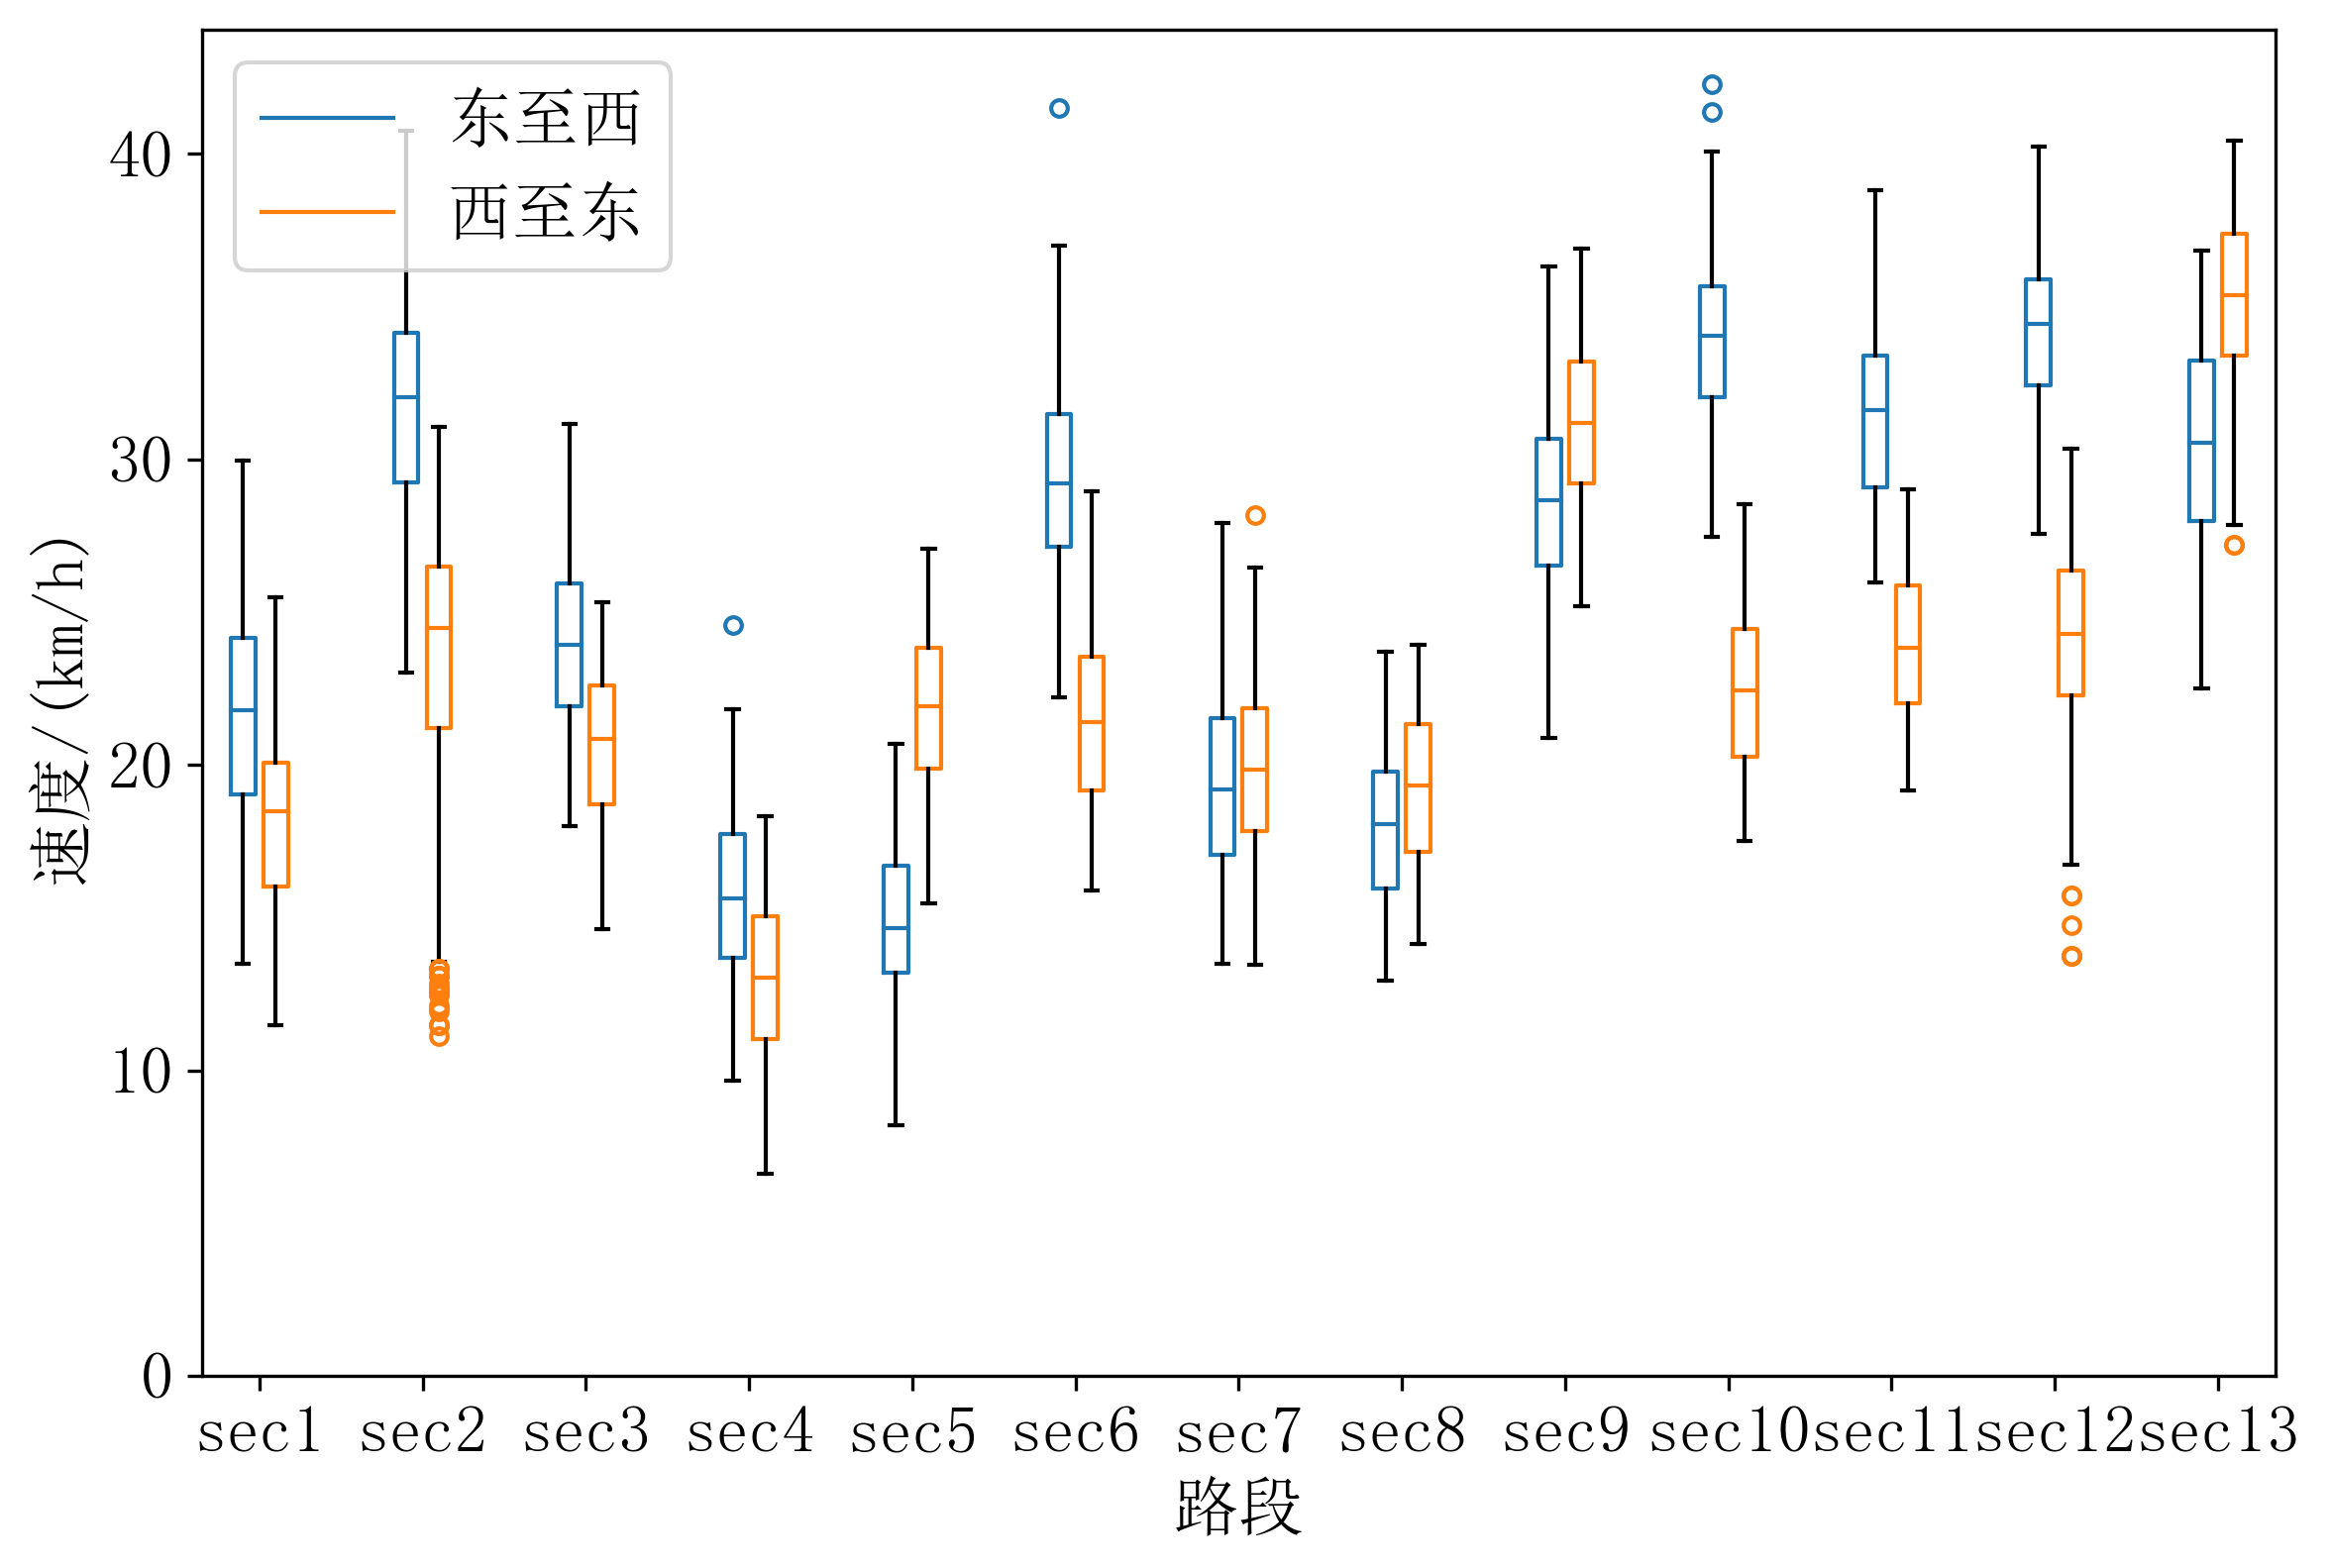

In [6]:
font1 = {'family': 'SimSun', 'weight': 'normal','size':16}
fig1=plt.figure(figsize=(9,6),dpi=300)
ax=fig1.add_subplot(111)
box1=ax.boxplot([d[d["name"]==i]["speed"] for i in range(12)],widths=0.3,boxprops={"color":'#1f77b4'},
           positions=[name[i]*2+1-0.2 for i in range(len(name)-1)],flierprops={"markersize":4,"markeredgecolor":'#1f77b4'},
           medianprops={"color":"#1f77b4"})

box2=ax.boxplot([d2[d2["name"]==i]["speed"] for i in range(12)],widths=0.3,boxprops={"color":'#ff7f0e'},
           positions=[name[i]*2+1+0.2 for i in range(len(name)-1)],flierprops={"markersize":4,"markeredgecolor":'#ff7f0e'},
           medianprops={"color":"#ff7f0e"})
# ax.legend(legends,labels,framealpha=0,prop=font1,bbox_to_anchor=(.02, 0.75, 1., .102),ncol=2,mode="expand", borderaxespad=0.)
#通过set_visible方法设置绘图区的顶部及右侧坐标轴隐藏
# fig1.gca().add_artist(l)

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.set_title('(b) 干道不同路段的车辆速度概率分布图',fontsize=14,y=-0.22)
ax.legend([box1['boxes'][1],box2['boxes'][1]],["东至西","西至东"],fontsize='small',prop=font1,loc="upper left")
ax.set_xlabel('路段',font1)
ax.set_ylabel('速度/(km/h)',font1)
ax.set_xticks([name[i]*2+1 for i in range(len(name)-1)],["sec"+str(name[i]+1) for i in range(len(name)-1)])
ax.set_xticklabels(ax.get_xticklabels(),fontdict=font1)
ax.set_yticks([i*10 for i in range(5)],[i*10 for i in range(5)])
ax.set_yticklabels(ax.get_yticklabels(),fontdict=font1)
plt.show()
fig1.tight_layout()#调整整体空白
fig1.savefig( "F:\\workspace\\jupyter\\论文\\graduation thesis\\pictures\\箱型图",bbox_inches='tight')

In [7]:
for i in name:
    dx=d[d["name"]==i].copy()
    ds=dx.loc[:,"speed"].copy()
    d1_up = ds.quantile(0.75)
    d1_low = ds.quantile(0.25)
    ds[(ds>=(d1_up-d1_low)*1.5+d1_up)|(ds<=d1_low-(d1_up-d1_low)*1.5)]=np.nan
    ds.fillna(ds.median(),inplace=True)
    dx.loc[:,"speed"]=ds
    d[d["name"]==i]=dx
for i in name:
    dx=d2[d2["name"]==i].copy()
    ds=dx.loc[:,"speed"].copy()
    d1_up = ds.quantile(0.75)
    d1_low = ds.quantile(0.25)
    ds[(ds>=(d1_up-d1_low)*1.5+d1_up)|(ds<=d1_low-(d1_up-d1_low)*1.5)]=np.nan
    ds.fillna(ds.median(),inplace=True)
    dx.loc[:,"speed"]=ds
    d2[d2["name"]==i]=dx

In [8]:
def func(x,mu,sigma,N,D):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))*N

In [9]:
def get_percent(data_x):
    area_list=np.array([[0,5],[5,10],[10,15],[15,20],[20,25],[25,30],[30,35],[35,40],[40,45],[45,50]])
    area_list=pd.DataFrame(area_list)
    area_list.columns=['ls','us']
    temp=list()
    for each in area_list.iterrows():
        temp.append(data_x[(data_x['speed']>each[1]['ls'])&(data_x['speed']<each[1]['us'])]['speed'].count())
    area_list['count']=np.array(temp)
    area_list['prop']=area_list['count']/area_list['count'].sum()
    area_list['ave']=(area_list['ls']+area_list['us'])/2
    return area_list

In [10]:
dh=pd.DataFrame()
for i in name:
    dx=d[d["name"]==i]
    area_list=get_percent(dx)
    dh=pd.concat([dh,area_list["count"]],axis=1)
dh=dh.T.reset_index(drop=True)
dh.columns=area_list["ave"]
dh=dh.T

In [11]:
dh2=pd.DataFrame()
for i in name:
    dx=d2[d2["name"]==i]
    area_list=get_percent(dx)
    dh2=pd.concat([dh2,area_list["count"]],axis=1)
dh2=dh2.T.reset_index(drop=True)
dh2.columns=area_list["ave"]
dh2=dh2.T

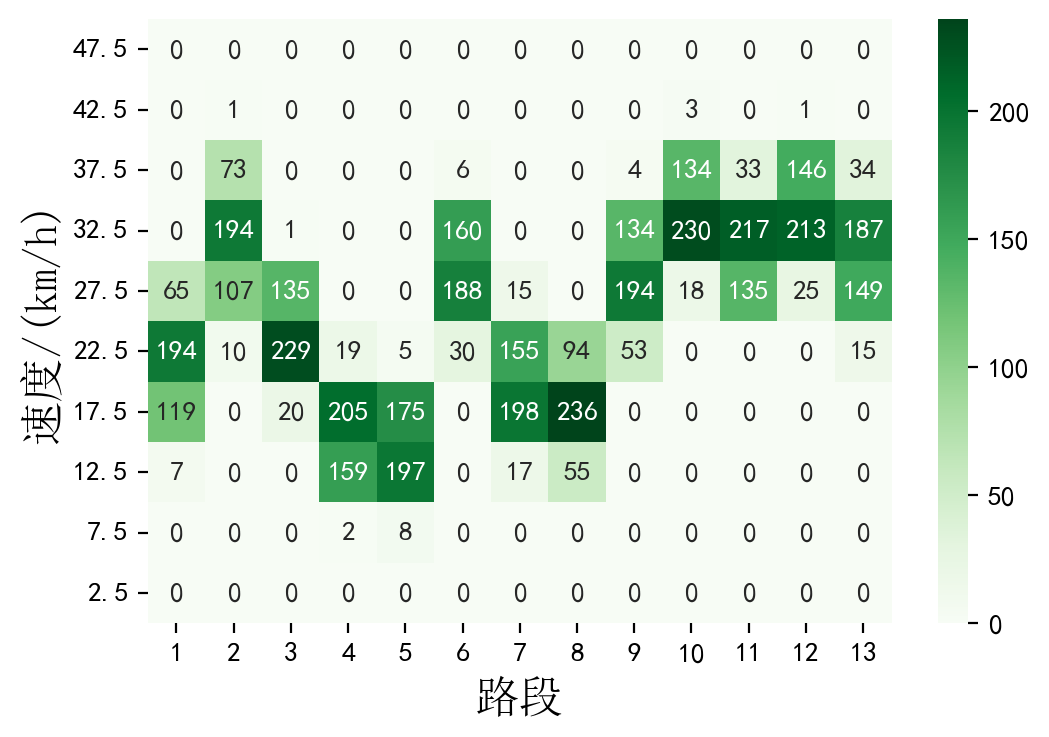

In [12]:
import seaborn as sns
import palettable#python颜色库
# from sklearn import datasets 

fig,ax=plt.subplots(dpi=200, figsize=(6,4))
sns.heatmap(dh[::-1].loc[:,:11],cmap=plt.get_cmap('Greens'),annot=True,fmt=".0f")
ax.set_xticklabels([str(i+1) for i in name])
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xlabel('路段',font1)
ax.set_ylabel('速度/(km/h)',font1)
plt.show()
fig.tight_layout()#调整整体空白
fig.savefig( "F:\\workspace\\jupyter\\论文\\graduation thesis\\pictures\\上行方向热力图",bbox_inches='tight')

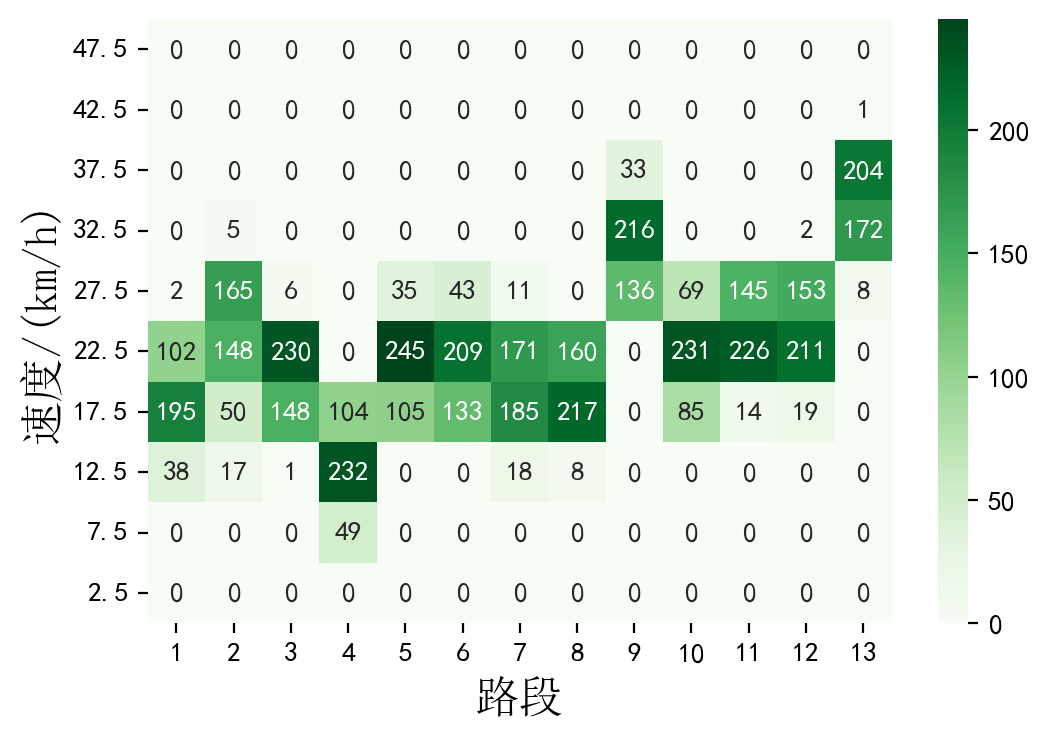

In [33]:
import seaborn as sns
import palettable#python颜色库
# from sklearn import datasets 

fig,ax=plt.subplots(dpi=200, figsize=(6,4))
sns.heatmap(dh2[::-1].loc[:,:11],cmap=plt.get_cmap('Greens'),annot=True,fmt=".0f")
ax.set_xticklabels([str(i+1) for i in name])
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xlabel('路段',font1)
ax.set_ylabel('速度/(km/h)',font1)
plt.show()
fig.tight_layout()#调整整体空白
fig.savefig( "F:\\workspace\\jupyter\\论文\\graduation thesis\\pictures\\下行方向热力图",bbox_inches='tight')

In [14]:
props=[]
for i in name:
    dx=d[d["name"]==i]
    area_list=get_percent(dx)
    propt,_=curve_fit(func,area_list['ave'],area_list['prop'],bounds=[0,[50.,20,1000,1000.]],maxfev=100000)
    props.append(propt)

In [15]:
props_in=[]
for i in name:
    dx=d2[d2["name"]==i]
    area_list=get_percent(dx)
    propt,_=curve_fit(func,area_list['ave'],area_list['prop'],bounds=[0,[50.,20,1000,1000.]],maxfev=100000)
    props_in.append(propt)

In [28]:
np.array(props).round(0)

array([[ 22.,   4.,   5., 500.],
       [ 32.,   4.,   5., 500.],
       [ 24.,   3.,   5., 500.],
       [ 15.,   3.,   5., 500.],
       [ 15.,   3.,   5., 500.],
       [ 30.,   3.,   5., 500.],
       [ 20.,   3.,   5., 500.],
       [ 18.,   3.,   5., 500.],
       [ 29.,   4.,   5., 500.],
       [ 34.,   3.,   5., 500.],
       [ 31.,   3.,   5., 500.],
       [ 34.,   3.,   5., 500.],
       [ 31.,   4.,   5., 500.]])

In [16]:
np.array(props_in).round(0)

array([[ 19.,   3.,   5., 500.],
       [ 25.,   4.,   5., 500.],
       [ 21.,   2.,   5., 500.],
       [ 13.,   3.,   5., 500.],
       [ 22.,   3.,   5., 500.],
       [ 21.,   3.,   5., 500.],
       [ 20.,   3.,   5., 500.],
       [ 20.,   3.,   5., 500.],
       [ 31.,   3.,   5., 500.],
       [ 22.,   3.,   5., 500.],
       [ 24.,   3.,   5., 500.],
       [ 24.,   3.,   5., 500.],
       [ 35.,   2.,   5., 500.]])

In [17]:
dx=d[(d["name"])==9|(d["name"]==10)]
area_list=get_percent(dx)
propt,_=curve_fit(func,area_list['ave'],area_list['prop'],bounds=[0,[50.,20,1000,1000.]],maxfev=100000)

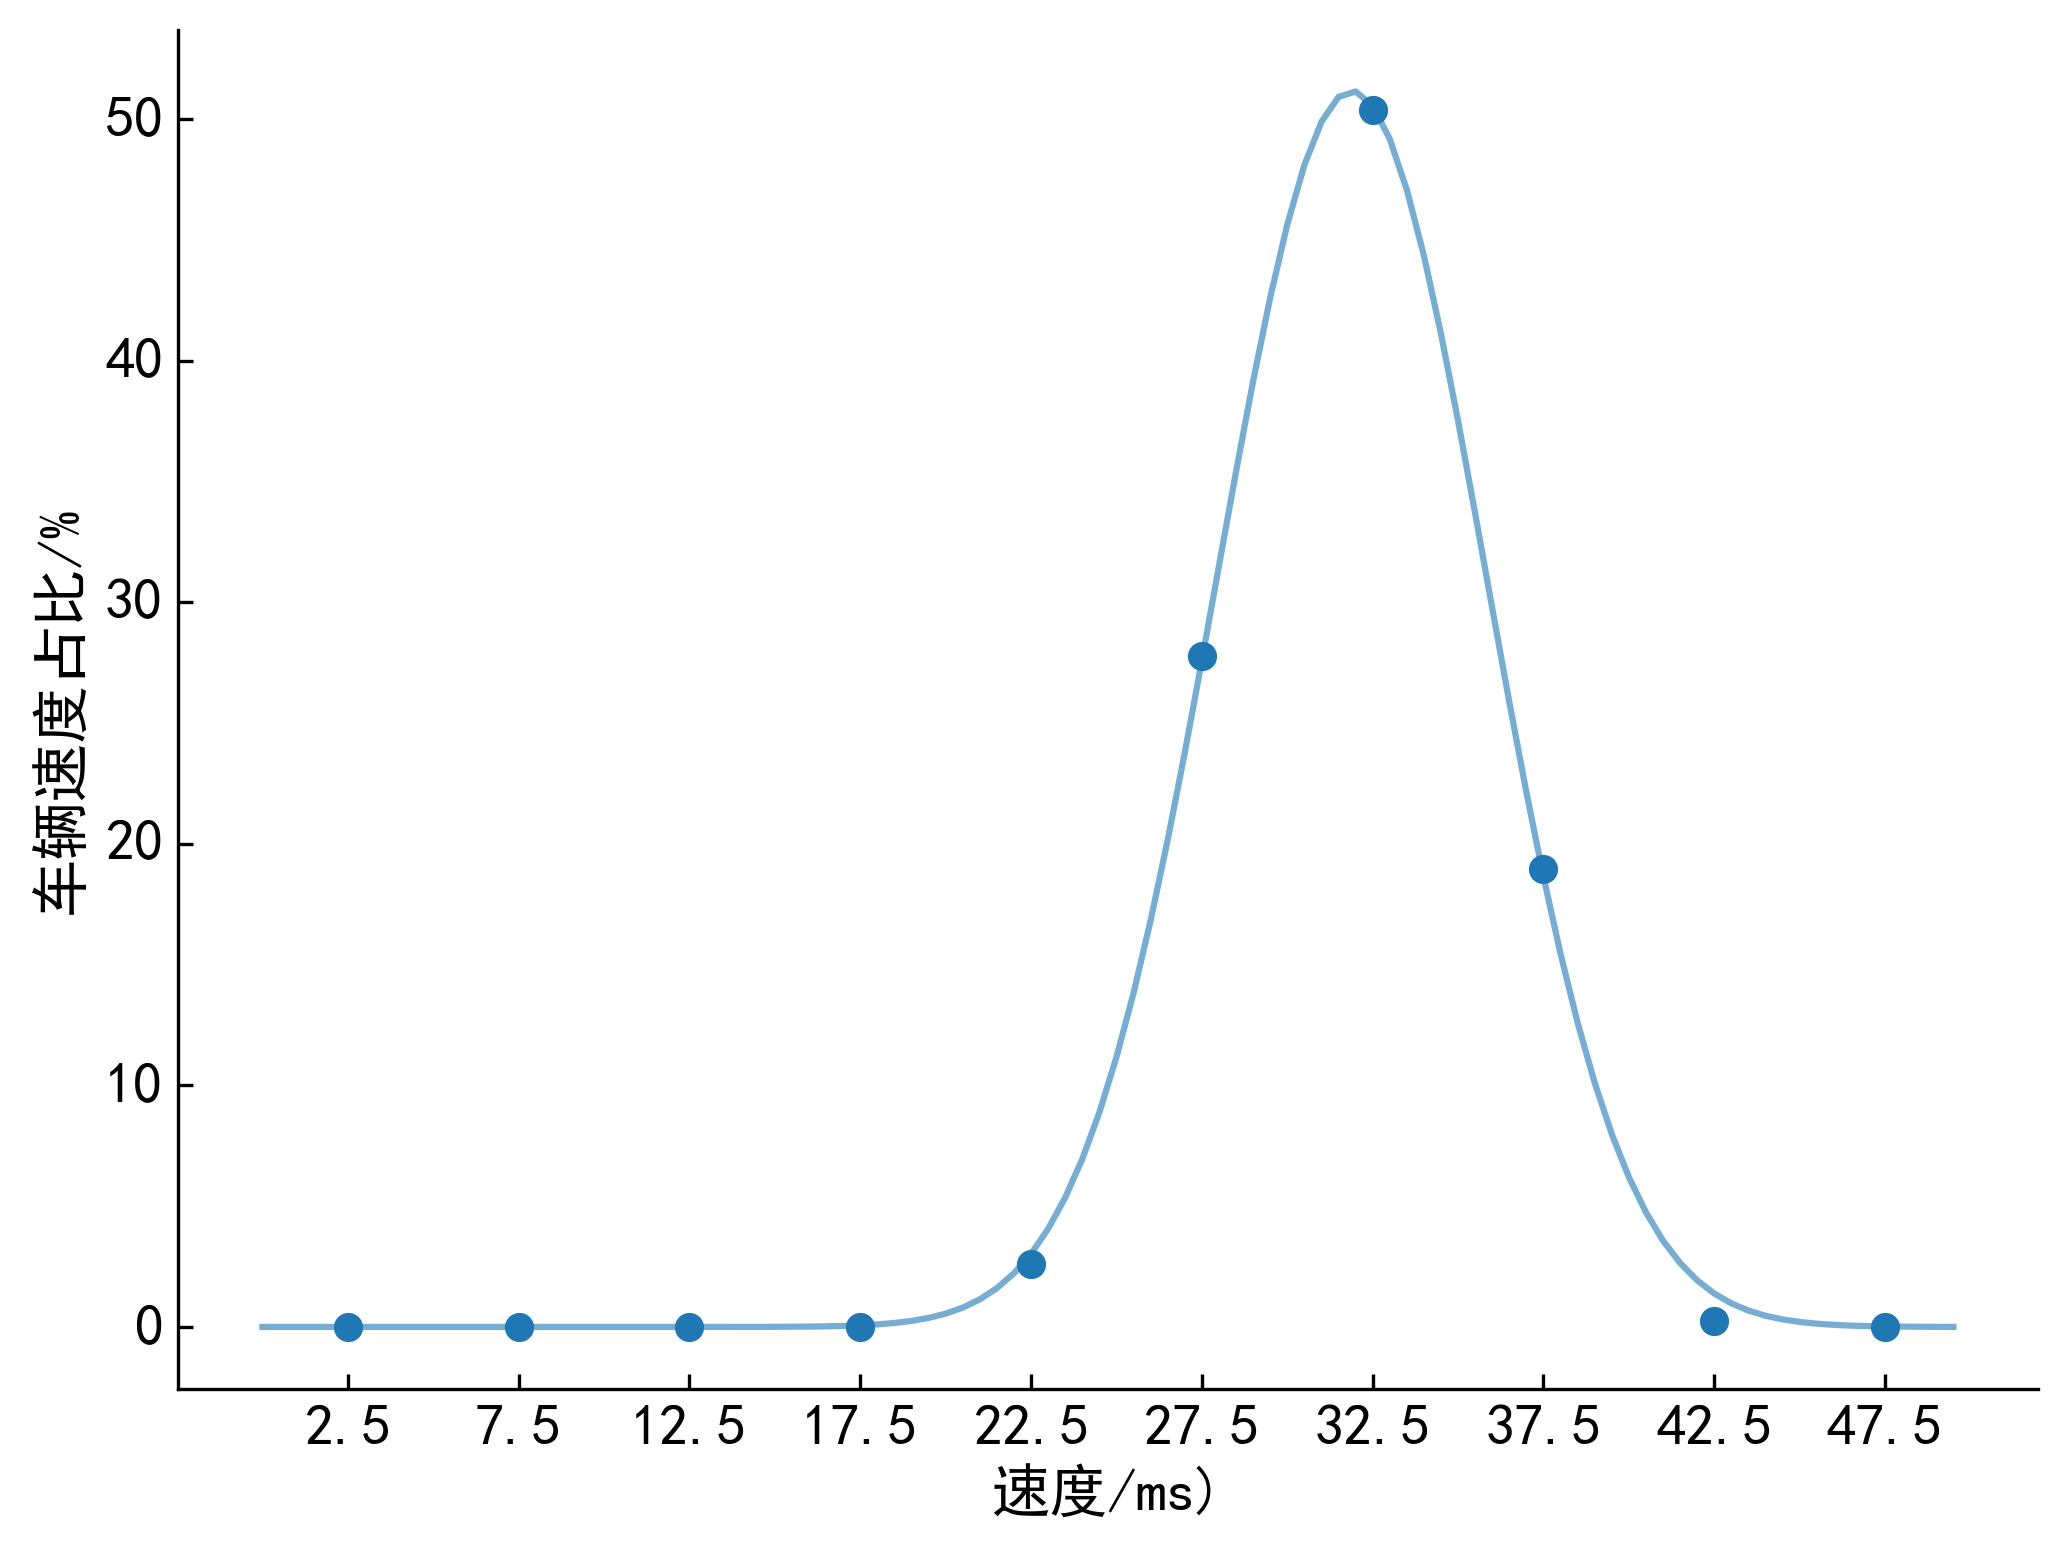

In [18]:
fig1=plt.figure(figsize=(8,6),dpi=300)
ax=AA.Subplot(fig1,111)
fig1.add_axes(ax)
linspace1=np.arange(0,50,0.5)

plt.scatter(area_list["ave"],area_list['prop']*100)
propt,propv=curve_fit(func,area_list['ave'],area_list['prop'],bounds=[0,[50,20,1000,1000.]],maxfev=100000)
legend,=plt.plot(linspace1,func(linspace1,*propt)*100,alpha=0.6)

ax.axis["top"].set_visible(False)
ax.axis["right"].set_visible(False)
# ax.set_title('(b) 干道不同路段的车辆速度概率分布图',fontsize=14,y=-0.22)
ax.set_xlabel('速度/ms)')
ax.set_ylabel('车辆速度占比/%')
ax.axis['left'].label.set_fontsize(14)
ax.axis['bottom'].label.set_fontsize(14)
ax.axis['left'].major_ticklabels.set_fontsize(14)
ax.axis['bottom'].major_ticklabels.set_fontsize(14)
ax.set_xticks(area_list['ave'])

plt.show()
fig1.tight_layout()#调整整体空白
# fig1.savefig( "F:\\workspace\\论文\\variable Speed\\curve_space_fit",bbox_inches='tight')


In [19]:
d[["name","speed"]].to_csv("./上行速度数据.csv")

In [20]:
d2[["name","speed"]].to_csv("./下行速度数据.csv")

In [21]:
a=False
for k in [1,2]:
    a|=d["name"]==k

d[a]

,index,date,time,name,origin,destination,distance,duration,speed
1,1,2023-03-07,21:12:54,1,"113.375752,22.519498","113.38199,22.519653",643,86,30.916279
2,2,2023-03-07,21:12:54,2,"113.383365,22.519686","113.386675,22.519707",344,57,24.726316
14,14,2023-03-07,21:13:25,1,"113.375752,22.519498","113.38199,22.519653",643,86,23.916279
15,15,2023-03-07,21:13:25,2,"113.383365,22.519686","113.386675,22.519707",344,54,25.933333
27,27,2023-03-07,21:13:57,1,"113.375752,22.519498","113.38199,22.519653",643,89,23.008989
...,...,...,...,...,...,...,...,...,...
4968,964,2023-03-08,00:31:41,2,"113.383365,22.519686","113.386675,22.519707",344,48,23.800000
4980,976,2023-03-08,00:32:12,1,"113.375752,22.519498","113.38199,22.519653",643,67,33.549254
4981,977,2023-03-08,00:32:12,2,"113.383365,22.519686","113.386675,22.519707",344,48,28.800000
4993,989,2023-03-08,00:32:43,1,"113.375752,22.519498","113.38199,22.519653",643,67,31.549254


In [22]:
p=np.array([0,0,0,0,1,0,0,1,0,0,0,1,0,0,0])

In [23]:
p=p.cumsum()+1

In [24]:
nx=[np.where(p==k)[0] for k in np.unique(p) ]

In [25]:
dx=d[(d["name"])==5|(d["name"]==6)]

In [26]:
d.groupby("name")["speed"].mean()

name
0     21.752754
1     31.749881
2     23.996858
3     15.659219
4     14.967200
5     29.267633
6     19.530452
7     18.019600
8     28.728347
9     33.902876
10    31.445477
11    34.140206
12    30.557781
Name: speed, dtype: float64

In [27]:
d2.groupby("name")["speed"].mean()

name
0     18.265010
1     23.749017
2     20.731772
3     13.136828
4     21.797964
5     21.406862
6     19.803963
7     19.195399
8     31.226616
9     22.476956
10    23.870653
11    24.299671
12    35.317889
Name: speed, dtype: float64